Experiment 7: Remis Algorithm

In [2]:
#Libraries required
import matplotlib.pyplot as plt
from scipy.signal import remez, freqz
import numpy as np

In [3]:
def plot_response(w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(w, 20*np.log10(np.abs(h)))
    ax.set_ylim(-40, 5)
    ax.grid(True)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Gain (dB)')
    ax.set_title(title)

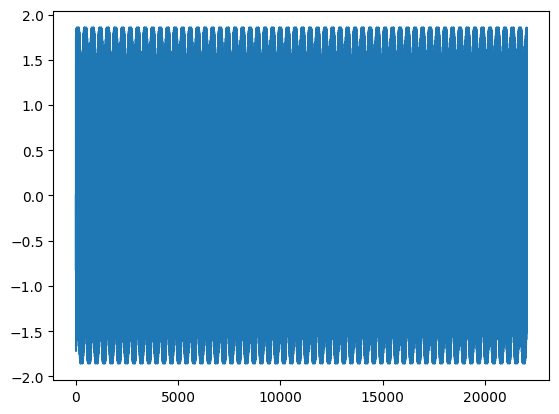

In [4]:
#input Signal
freq_sam = 22050
f1 = 6000
f2 = 10000
w1 = 2 * 3.14* f1
w2 = 2 * 3.14* f2
x = [ np.sin(w1 * t) + np.sin(w2 * t) for t in np.linspace(0,1,freq_sam)]
plt.plot(x)

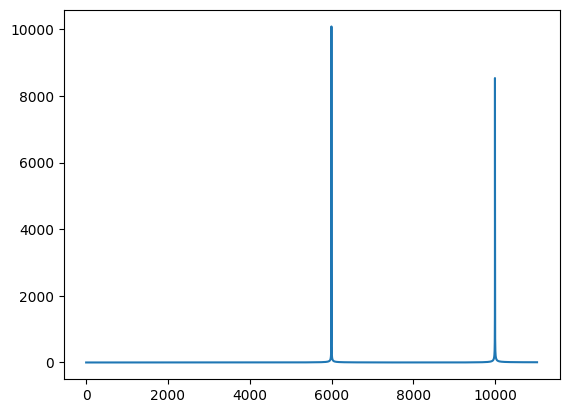

In [5]:
y=np.fft.fft(x)
plt.plot(np.abs(y[0:int(freq_sam/2)]))

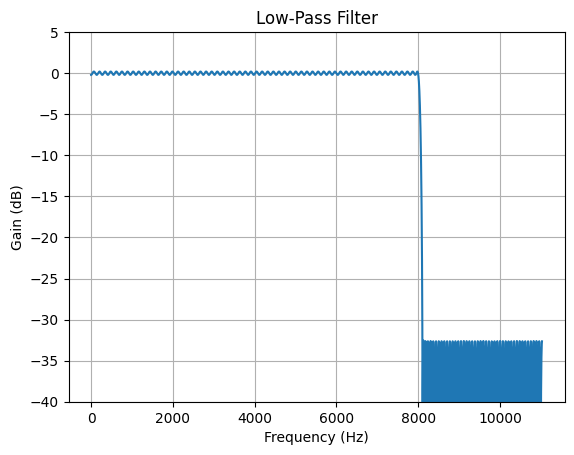

In [6]:
cutoff = 8000
tran_width = 100
length = 325
li = [0,cutoff,cutoff+tran_width, 0.5*freq_sam]
taps = remez(length,li,[1,0],fs=freq_sam)
w,h = freqz(taps,[1],worN= 11025, fs=freq_sam)
plot_response(w,h, "Low-Pass Filter")

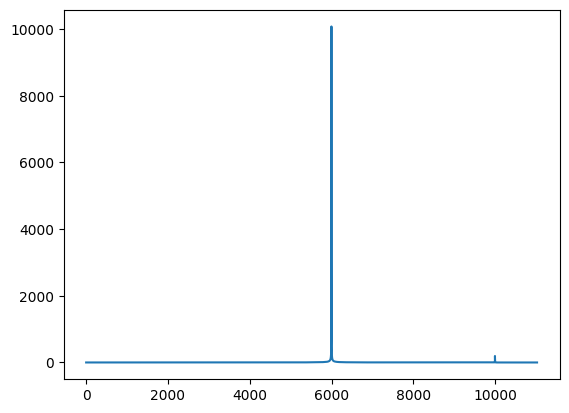

In [7]:
p = np.fft.fft(x) 
output = p[0:int(freq_sam/2)] * h
plt.plot(abs(output))

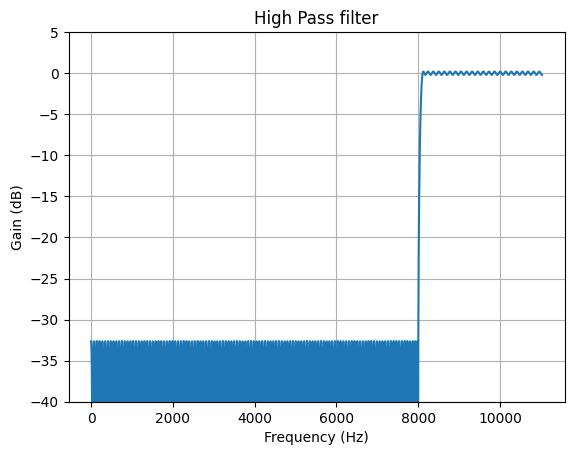

In [8]:
taps1 = remez(length,li,[0,1],fs=freq_sam)
w1,h1 = freqz(taps1,[1],worN= 11025, fs=freq_sam)
plot_response(w1,h1,"High Pass filter")

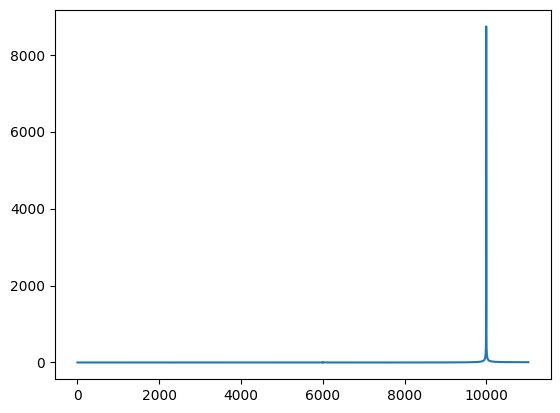

In [9]:
output1 = p[0:int(freq_sam/2)] * h1
plt.plot(abs(output1))

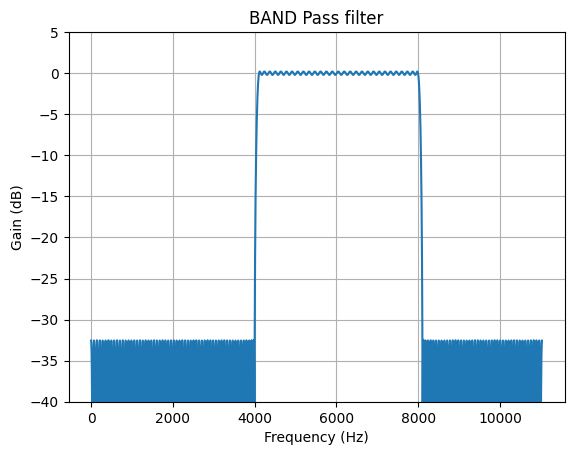

In [10]:
fc1 = 4000
fc2 = 8000
li2 = [0, fc1, fc1 + tran_width, fc2, fc2 + tran_width, 0.5*freq_sam]
taps2 = remez(length,li2,[0,1,0],fs=freq_sam)
w2,h2 = freqz(taps2,[1],worN= 11025, fs=freq_sam)
plot_response(w2,h2,"BAND Pass filter")

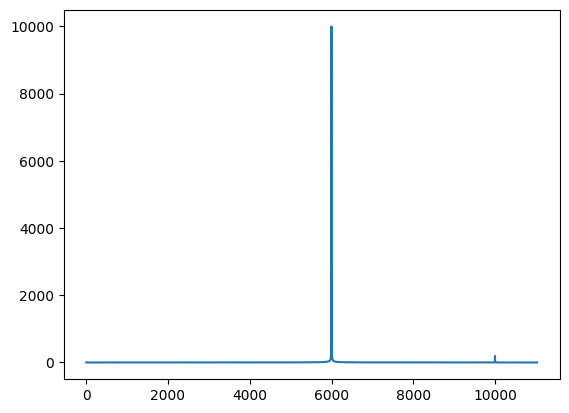

In [14]:
output2 = p[0:int(freq_sam/2)] * h2
plt.plot(abs(output2))

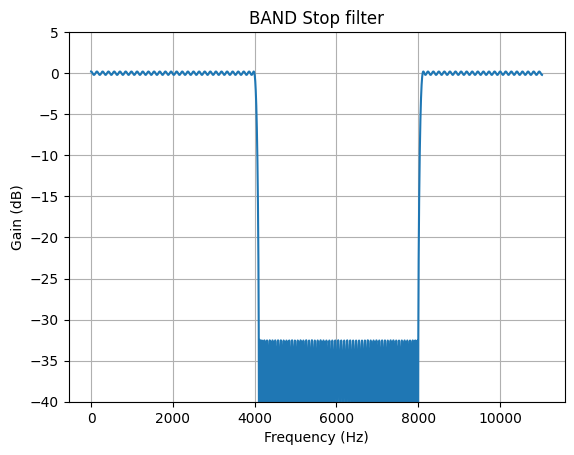

In [12]:
taps3 = remez(length,li2,[1,0,1],fs=freq_sam)
w3,h3 = freqz(taps3,[1], worN= 11025,fs=freq_sam)
plot_response(w3,h3,"BAND Stop filter")

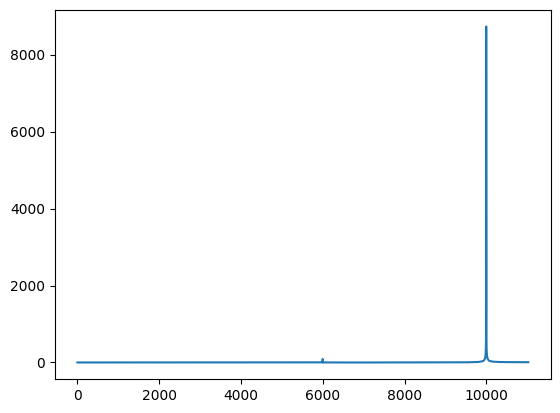

In [15]:
output3 = p[0:int(freq_sam/2)] * h3
plt.plot(abs(output3))